In [1]:
# update plotly if necessary
# !conda remove plotly plotly-orca -y && conda install plotly -y

In [2]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from scipy.special import softmax
import plotly.express as px
import seaborn as sns
import sys
import os

sys.path.append('../../')
from common.plot_style_utils import set_pub_plot_context, save_for_pub
%matplotlib inline

In [3]:
y = pickle.load(
    open('../../../data/tts/y_val_ord.pkl', 'rb')
)

In [4]:
y

array([ 142., 1136., 1136., ...,  972., 1269.,  452.])

In [5]:
encoder = pickle.load(
    open("../../../data/deteRNNt_exploration/sklearn_labid_to_ordinal.pkl", "rb")
)


display(encoder.inverse_transform(y.reshape(-1,1)))

array([[ 397],
       [3250],
       [3250],
       ...,
       [2808],
       [3585],
       [1315]])

In [6]:
ylab_ids = encoder.inverse_transform(y.reshape(-1,1))

In [7]:
# The processed for prediction one is for only the subset we have affiliation info for.
# This is everything.
addgene_full = pickle.load(
    open("../../../data/full/addgene_full.pickle", "rb")
)
addgene_full

lab_id                          plasmid               lab  \
addgene_id                                                              
3              397                         pSV-PGC1  Bruce Spiegelman   
4              397                         GFP-PGC1  Bruce Spiegelman   
6              397                        pCMX-PGC1  Bruce Spiegelman   
41             397                    pcDNA-p160MBP  Bruce Spiegelman   
42             397                     pcDNA-p67MBP  Bruce Spiegelman   
43             397                pcDNA-p160(1-200)  Bruce Spiegelman   
44             397              pcDNA-p160(200-400)  Bruce Spiegelman   
45             397              pcDNA-p160(400-580)  Bruce Spiegelman   
46             397                      pcDNA-p160C  Bruce Spiegelman   
47             397                  pcDNA-f:PGC1-3D  Bruce Spiegelman   
48             397               pcDNA-f:PGC1-L2/3A  Bruce Spiegelman   
49             397                       Ad-p160MBP  Bruce Spiegelman   
50             397                        Ad-p67MBP  Bruce Spiegelman   
51             397                     Gal4-p160MBP  Bruce Spiegelman   
52             397                      Gal4-p67MBP  Bruce Spiegelman   
1015           397                   PPRE X3-TK-luc  Bruce Spiegelman   
1026           397                     pcDNA-f:PGC1  Bruce Spiegelman   
1028           397                 pGEX-PGC1(1-180)  Bruce Spiegelman   
1029           397                 pGEX-PGC1(1-400)  Bruce Spiegelman   
1030           397          pcDNA-f:PGC1(delta CTD)  Bruce Spiegelman   
1031           397                    pcDNA-f:PGC1b  Bruce Spiegelman   
1032           397                       pCMX-PGC1b  Bruce Spiegelman   
1084          2000            pGEX-2T-p85alpha-CSH2     Lewis Cantley   
1086          3250                        pRSCupGFP   Susan Lindquist   
1087          3250                   pRSCupSup35GFP   Susan Lindquist   
1088          3250                         pJCSUP35   Susan Lindquist   
1089          3250                  pJCSUP35(1-253)   Susan Lindquist   
1090          3250                pJCSUP35(123-254)   Susan Lindquist   
1091          3250                  pJCSUP35(1-122)   Susan Lindquist   
1092          3250                pJCSUP35(254-684)   Susan Lindquist   
...            ...                              ...               ...   
115198        2445         pLEX307_PDHA2S291A/S293A        Mohan Babu   
115199        2445                 pLEX307_CR-PDHA2        Mohan Babu   
115200        2445            pLEX307_CR-PDHA2S291D        Mohan Babu   
115201        2445            pLEX307_CR-PDHA2S293D        Mohan Babu   
115202        2445      pLEX307_CR-PDHA2S291D/S293D        Mohan Babu   
115203        2445            pLEX307_CR-PDHA2S291A        Mohan Babu   
115204        2445            pLEX307_CR-PDHA2S293A        Mohan Babu   
115205        2445      pLEX307_CR-PDHA2S291A/S293A        Mohan Babu   
115232        1315                         pLV-TTBG    Ian Wickersham   
115233        1315                         pLV-TTBL    Ian Wickersham   
115234        1315     pLV-CAG-FLEX-BFP2-(mCherry)’    Ian Wickersham   
115235        1315  pLV-CAG-F14F15S-BFP2-(mCherry)'    Ian Wickersham   
115236        1315                     pLV-U-TVA950    Ian Wickersham   
115245        2078                 NODALvar-MYC-DYK    Lynne Postovit   
115246        2078           NODALvar-MYC-DYK-N328A    Lynne Postovit   
115247        2078              NODAL-MYC-DYK-C312S    Lynne Postovit   
115248        2078                     NODAL-matMYC    Lynne Postovit   
115249        2078                  NODALvar-matMYC    Lynne Postovit   
115252        2078         NODAL-MYC-DYK-N72A-N199A    Lynne Postovit   
115253        2078              NODAL-MYC-DYK-C312A    Lynne Postovit   
115254        2078           NODALvar-MYC-DYK-C302S    Lynne Postovit   
115255        2078           NODALvar-MYC-DYK-C302A    Lynne Postovit 

In [8]:
# only the unk_engineered index is missing
set(tuple(ylab_ids.reshape(-1).tolist())) - set(tuple(addgene_full.lab_id.values.tolist()))

{999999}

In [9]:
labinfo = addgene_full.loc[:,['lab_id', 'lab']]
labinfo = labinfo.drop_duplicates(subset='lab_id').set_index('lab_id')
labinfo

lab
lab_id                            
397               Bruce Spiegelman
2000                 Lewis Cantley
3250               Susan Lindquist
1115           Gokhan Hotamisligil
2004                  Li-Huei Tsai
2576                 Pamela Silver
2390               Michael Sherman
142                    Andrew Fire
1039                   Garry Nolan
570                  Craig Montell
342                   Bob Weinberg
1207                  Hartmut Land
1298                  Hyeryun Choe
2346             Michael Greenberg
498              Christian Tschudi
3529                Walther Mothes
2718                  Philip Leder
701                 David Sabatini
3011         Sander van den Heuvel
1720                 Joseph Avruch
2897               Robert Kingston
1673                   Jon Ashwell
286                       Ben Neel
2655               Pere Puigserver
1466                    Jean Kinet
1997               Leslie Vosshall
583              Cynthia Wolberger
1501                 Jeffrey Green
150                  Andrew Lassar
1019            Frederic Mushinski
...                            ...
2094                 Manfred Ogris
1086                Gerald Schwank
3484              Vanessa LaPointe
2086           Magdalena Bezanilla
1645                 John Lipscomb
1370                    Jack Pronk
0                 A. Radu Aricescu
1786                  Jungjoon Lee
1803             Kai Wucherpfennig
2643                Pavel Volchkov
1057                    Geert Kops
59            Aleksandra Radenovic
1531                    Jeremy Day
915                     Eric Miska
513     Christopher A. O'Callaghan
2216                Martin Caffrey
2435                  Mingshan Xue
3236                Sudhir Krishna
1297                 Hunter Fraser
2593               Patrick Caffrey
162                 Andrew Woolley
1423                 James Trimmer
1083                   Gerald Dorn
1328                Ilka Heinemann
218            Anushree Chatterjee
3582               William Studier
893                    Emily Liman
3427              Tomomi Kiyomitsu
3695             Youssef Belkhadir
66                    Alex Palazzo

[3751 rows x 1 columns]

In [10]:
# divide by the temp scaling factor
logits = np.load('../../../data/results/VAL_LOGITS_100_sub_MLP_full_with_metadata_300300.npy') / 1.7226
val_predicted_probs = softmax(logits, axis=1)

In [11]:
# how much probability assigned to the correct answer
predicted_true_class_prob = val_predicted_probs[
    np.arange(len(logits)), y.astype(np.int)
]
predicted_true_class_prob.shape

(7466,)

In [12]:
representations = np.load('../../../data/deteRNNt_exploration/val_hiddens_with_metadata.npy')

In [13]:
representations

array([[[-0.31502777, -0.568568  , -0.999775  , ..., -0.9950432 ,
         -0.17970675,  2.123661  ]],

       [[-0.8297803 , -0.73196113, -0.9941479 , ..., -0.86421007,
         -0.99085647, -0.99999774]],

       [[-0.9988539 , -0.6840676 , -0.606365  , ..., -0.9811461 ,
         -0.23970987, -0.9847826 ]],

       ...,

       [[ 1.4160361 , -0.9500605 , -0.8456726 , ...,  0.5294339 ,
         -0.4896804 ,  0.0550822 ]],

       [[-0.59341615, -0.92051864,  2.2349114 , ...,  0.34057155,
         -0.20110546, -0.83938926]],

       [[-0.78906554, -0.609539  ,  0.13385558, ...,  1.2402153 ,
         -0.9504755 , -0.19853154]]], dtype=float32)

In [14]:
representations.shape

(7466, 1, 1000)

In [15]:
tsne = TSNE(n_components=2, random_state=42)

In [16]:
coords = tsne.fit_transform(representations.squeeze())

In [17]:
coords

array([[ 27.848917 ,  14.5623045],
       [-21.10837  , -41.534634 ],
       [ -9.124278 , -39.800983 ],
       ...,
       [  8.180272 ,  24.884304 ],
       [-45.65586  , -11.643207 ],
       [ 39.25328  , -11.273883 ]], dtype=float32)

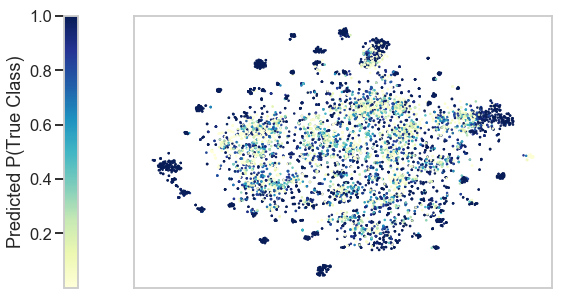

In [18]:
import warnings
warnings.filterwarnings('once')
set_pub_plot_context(context='talk')
fig, ax = plt.subplots(figsize=(10,5))
im = ax.scatter(coords[:,0], coords[:,1], s=1, c=predicted_true_class_prob, cmap='YlGnBu')
cbar = plt.colorbar(im, ax=[ax], location='left')
cbar.set_label("Predicted P(True Class)")
ax.set_xticks([])

ax.set_xticks([], minor=True)
ax.set_yticks([])

ax.set_yticks([], minor=True)
os.makedirs('../../../data/manuscript/figs/5/a',exist_ok=True)
save_for_pub(fig, path="../../../data/manuscript/figs/5/a/v0", dpi=500)

In [19]:
ylab_ids

array([[ 397],
       [3250],
       [3250],
       ...,
       [2808],
       [3585],
       [1315]])

In [20]:
ylab_names = labinfo.loc[ylab_ids.squeeze(),'lab']

/home/sandias42/miniconda3/envs/attrib/lib/python3.6/site-packages/pandas/core/indexing.py:1017: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [21]:
ylab_names

lab_id
397                           Bruce Spiegelman
3250                           Susan Lindquist
3250                           Susan Lindquist
3250                           Susan Lindquist
3250                           Susan Lindquist
3250                           Susan Lindquist
3250                           Susan Lindquist
3250                           Susan Lindquist
3250                           Susan Lindquist
3250                           Susan Lindquist
1115                       Gokhan Hotamisligil
2004                              Li-Huei Tsai
2576                             Pamela Silver
2576                             Pamela Silver
2000                             Lewis Cantley
2000                             Lewis Cantley
1115                       Gokhan Hotamisligil
142                                Andrew Fire
142                                Andrew Fire
142                                Andrew Fire
142                                Andrew Fire
142   

In [22]:
fig = px.scatter(x=coords[:, 0], y=coords[:, 1], color=predicted_true_class_prob,
                 color_continuous_scale=px.colors.sequential.RdBu, text=ylab_names.values)

fig.show()

In [23]:
fig = go.Figure(data=go.Scatter(x=coords[:, 0],
                                y=coords[:, 1],
                                marker=dict(
                                size=5,
                                color=predicted_true_class_prob, #set color equal to a variable
                                colorscale=px.colors.sequential.Sunset, # one of plotly colorscales
                                showscale=True
                                ),
                                mode='markers',
                                #color=predicted_true_class_prob,
                                #color_continuous_scale=px.colors.sequential.RdBu,
                                text=ylab_names.values))
fig.show()

In [24]:
tsne = TSNE(n_components=3)

In [25]:
coords = tsne.fit_transform(representations.squeeze())

/home/sandias42/miniconda3/envs/attrib/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning:

the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.



In [26]:
coords

array([[ -3.1999795 ,   9.21911   ,   1.7375616 ],
       [-11.858282  , -12.753202  , -14.384156  ],
       [ -5.3850203 , -14.520003  , -15.819578  ],
       ...,
       [  3.5069    ,   0.06557451,  11.710785  ],
       [-24.297855  ,  -3.23273   ,  -6.0416856 ],
       [  0.9325322 , -11.865467  ,  -3.8644507 ]], dtype=float32)

In [27]:
np.save("3d_tsne_coords", coords)
np.save("3d_predicted_prob", predicted_true_class_prob)
np.save("3d_lab_names", ylab_names.values)

In [28]:
fig = go.Figure(data=[go.Scatter3d(
    x=coords[:,0],
    y=coords[:,1],
    z=coords[:,2],
    mode='markers',
    hovertext=ylab_names.values,
    marker=dict(size=2, opacity=.5, color=predicted_true_class_prob, #set color equal to a variable
                                colorscale=px.colors.sequential.Sunset, # one of plotly colorscales
                                showscale=True)#, line=dict(width=.01,
                                   #     color='black'), )
)])
fig.show()